#  Import libraries

In [1]:
#Basic 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

np.random.seed(9)


In [186]:
import Data_Cleaning as dc


# Import Data

In [30]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [17]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [53]:
test.shape

(1459, 80)

In [219]:
dc.has_not_avaliable(train)

'Not avaliable' not existing


False

In [194]:
dc.is_nan(train)

19

In [200]:
missing_values_table=dc.missing_values_table(train)

ERROR:root:
UnicodeDecodeError while processing traceback.



NameError: name 'pd' is not defined

In [31]:
def missing_values_table(df):
    # Total missing values by each column
        mis_val=df.isnull().sum()
        
    # Percentage of missing values
        mis_val_percen=100*df.isnull().sum()/len(df)
        
    # Make a table with the results
        mis_val_table=pd.concat([mis_val, mis_val_percen],axis=1)
        
    # Rename the columns
        mis_val_table_ren_column=mis_val_table.rename(columns = {0:'missing values',1:'% of total values'})
        
    # Sort the table by percentage of missing descending
        mis_val_table_ren_column= mis_val_table_ren_column[mis_val_table_ren_column.iloc[:,1]!=0].sort_values('% of total values',ascending=False).round(2)
        
    # Print some summary information
        print('The selected DataFrame has '+str(df.shape[1])+' columns.\n'+'There are '+str(mis_val_table_ren_column.shape[0])+ ' columns with missing values')
              
        fig,ax=plt.subplots(figsize=(20, 10))
        ax.bar(mis_val_table_ren_column.index,mis_val_table_ren_column['missing values'])
        ax.set_xticklabels(mis_val_table_ren_column.index,rotation=90)
        plt.show()
    
    # Return the dataframe with missing information 
        return mis_val_table_ren_column

The selected DataFrame has 81 columns.
There are 19 columns with missing values


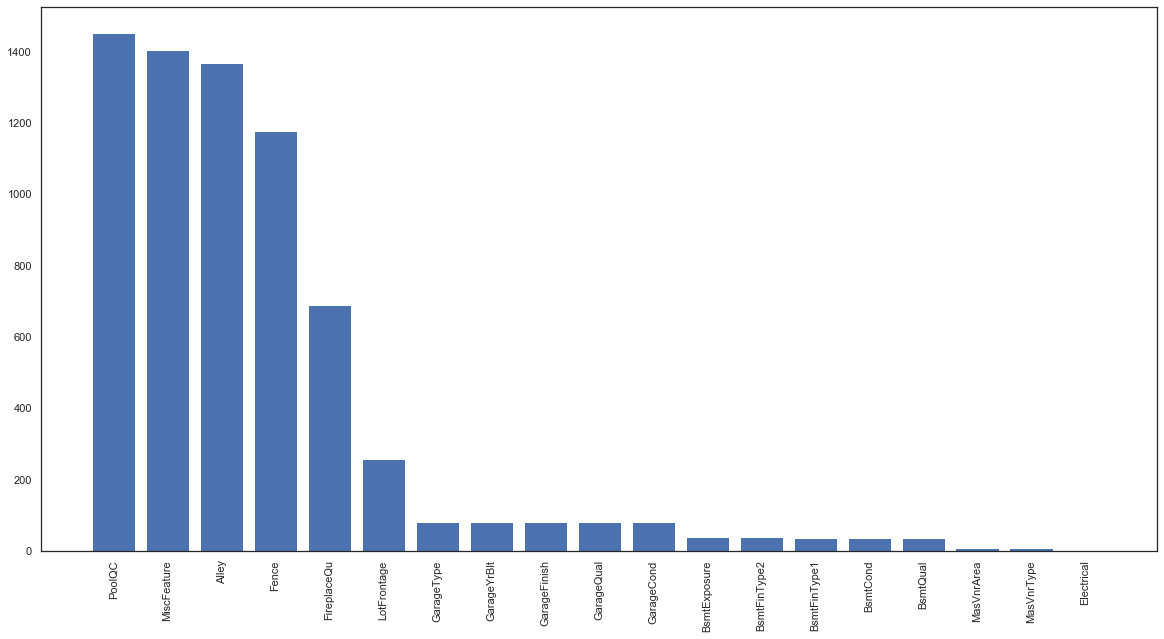

,missing values,% of total values
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


In [34]:
missing_values_table(train)

The selected DataFrame has 80 columns.
There are 33 columns with missing values


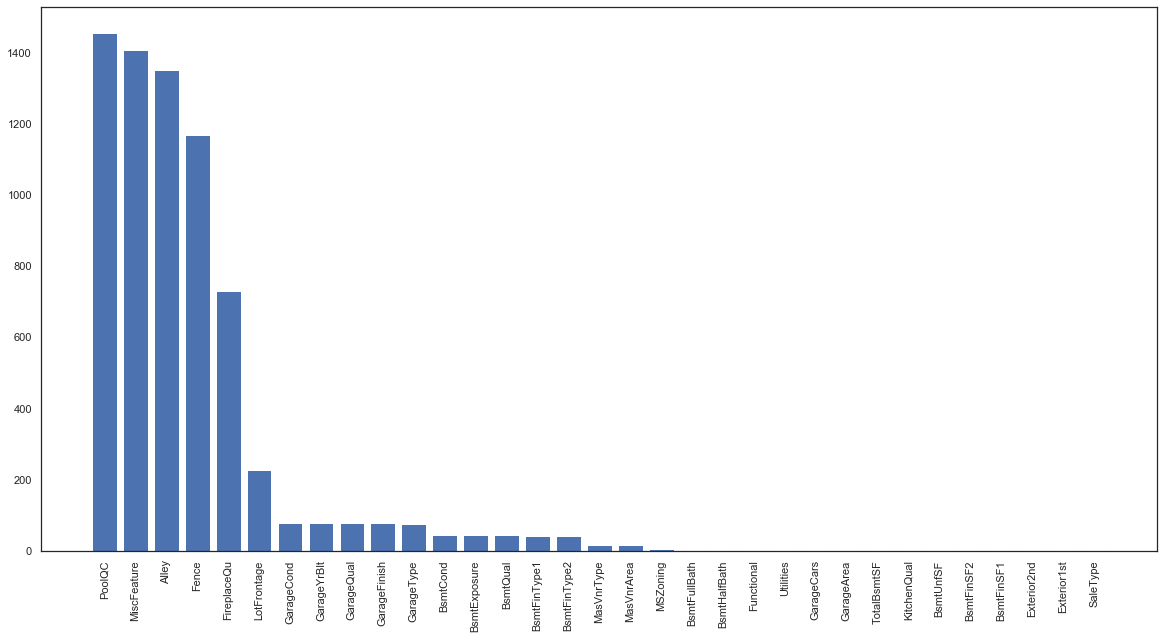

,missing values,% of total values
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageYrBlt,78,5.35
GarageQual,78,5.35
GarageFinish,78,5.35


In [33]:
missing_values_table(test)

In [35]:
# Drop the columns with > X% missing
def drop_much_missing(df,X):
    data_missing=missing_values_table(df)
    data_missing=data_missing[data_missing.loc[:,'% of total values']>X]
    mis_names=data_missing.index
    
    df=df.drop(columns=mis_names)
    return df

The selected DataFrame has 81 columns.
There are 19 columns with missing values


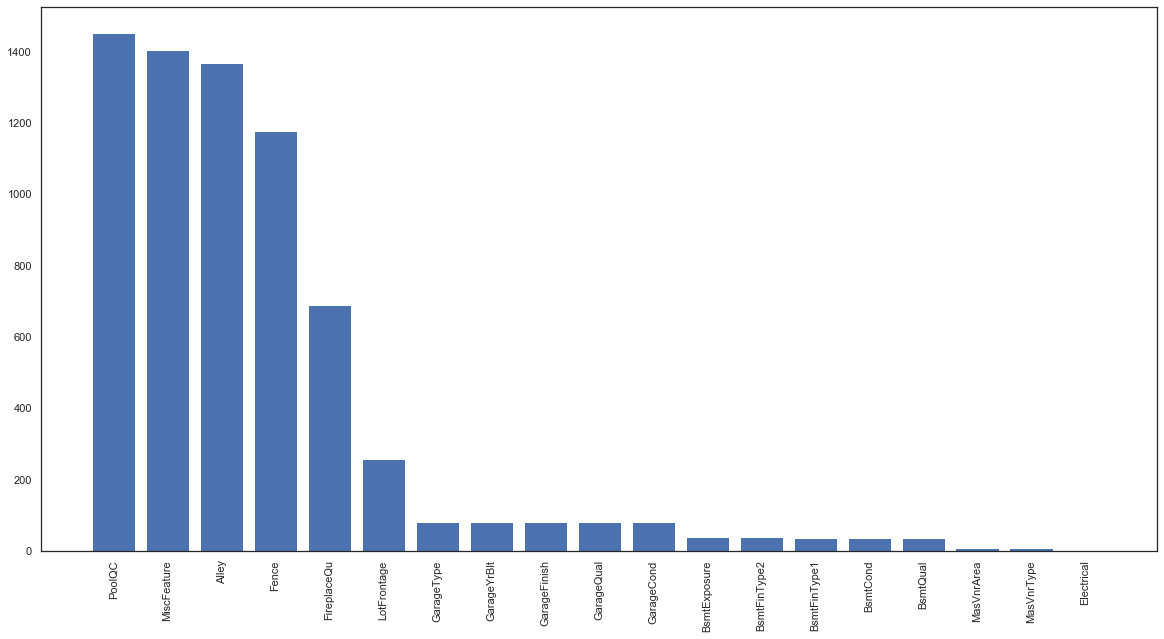

In [36]:
train_dropped_missing=drop_much_missing(train,80)

In [37]:
train_dropped_missing.shape

(1460, 77)

The selected DataFrame has 80 columns.
There are 33 columns with missing values


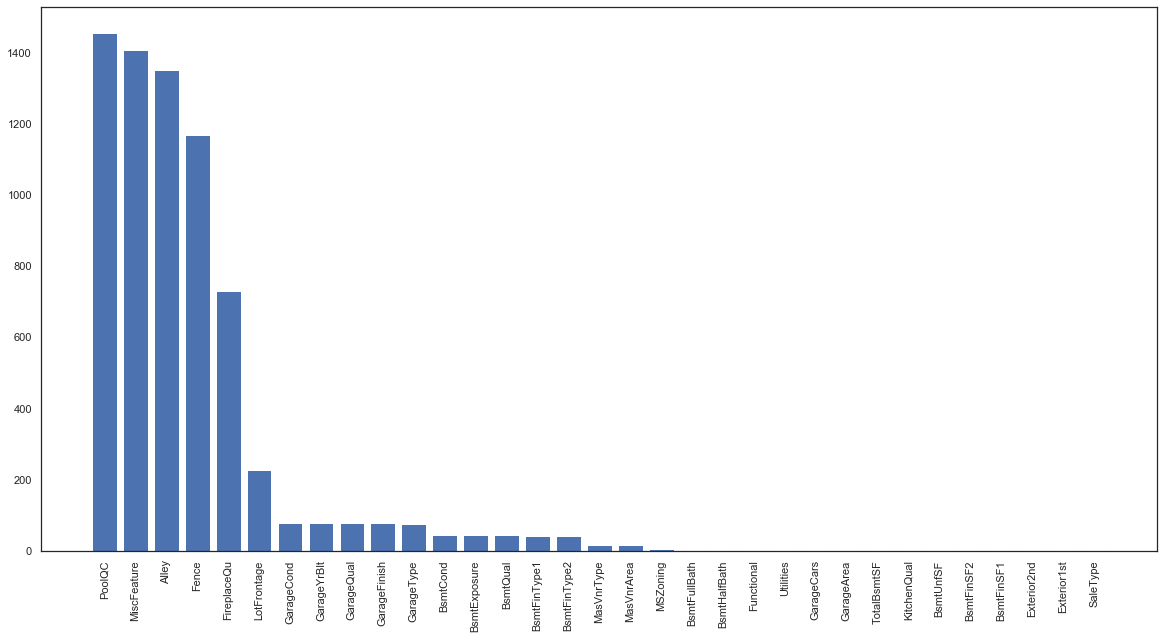

In [38]:
test_dropped_missing=drop_much_missing(test,80)

In [39]:
test_dropped_missing.shape

(1459, 76)

In [224]:
def rows_missing_values(df):
    for col in df.columns:
        missing = df[col].isnull()
        num_missing = np.sum(missing)
    
        if num_missing > 0:  
         print('created missing indicator for: {}, - {}'.format(col,num_missing))
         df['{}_ismissing'.format(col)] = missing



    ismissing_cols = [col for col in train.columns if 'ismissing' in col]
    df['num_missing'] = df[ismissing_cols].sum(axis=1)
    mis_rows_table=df['num_missing'].sort_values(ascending=False)
    mis_rows_table_ren_column=mis_rows_table.to_frame().rename(columns = {0:'index',1:'num_missing'}).reset_index()
    mis_rows_table_ren_column= mis_rows_table_ren_column.loc[:][mis_rows_table_ren_column['num_missing']>(len(mis_rows_table_ren_column))/2]
   
    if not mis_rows_table_ren_column.empty:
        mis_rows_table_ren_column.plot.bar(x='index', y='num_missing',figsize=(20,10))
    else: 
        print ('The dataset has not rows with more then 50% values missing')
        
    
    return mis_rows_table_ren_column

In [225]:
rows_missing_values(train_dropped_missing)

created missing indicator for: LotFrontage, - 259
created missing indicator for: MasVnrType, - 8
created missing indicator for: MasVnrArea, - 8
created missing indicator for: BsmtQual, - 37
created missing indicator for: BsmtCond, - 37
created missing indicator for: BsmtExposure, - 38
created missing indicator for: BsmtFinType1, - 37
created missing indicator for: BsmtFinType2, - 38
created missing indicator for: Electrical, - 1
created missing indicator for: FireplaceQu, - 690
created missing indicator for: GarageType, - 81
created missing indicator for: GarageYrBlt, - 81
created missing indicator for: GarageFinish, - 81
created missing indicator for: GarageQual, - 81
created missing indicator for: GarageCond, - 81
The dataset has not rows with more then 50% values missing


,index,num_missing


In [40]:
dupl=train_dropped_missing.duplicated()
s=0
for ind in dupl.index:
    if dupl.loc[ind]==True:
        s+=1
print(s)

0


In [44]:
train_numeric=train_dropped_missing.select_dtypes(include=[np.number])
numeric_cols=train_numeric.columns.values
for col in numeric_cols:
    missing=train_dropped_missing[col].isnull()
    missing_sum=np.sum(missing)
    
    if missing_sum>0:
        print('imputing missing values for: {}'.format(col))
        train_dropped_missing[col]=train_dropped_missing[col].fillna(train_dropped_missing[col].median())

In [45]:
train_non_numeric=train_dropped_missing.select_dtypes(exclude=[np.number])
non_numeric_cols=train_non_numeric.columns.values
for col in non_numeric_cols:
    missing=train_dropped_missing[col].isnull()
    missing_sum=np.sum(missing)
    
    if missing_sum>0:
       print('imputing missing values for: {}'.format(col)) 
       train_dropped_missing[col]=train_dropped_missing[col].fillna(train_dropped_missing[col].describe()['top'])

In [46]:
test_numeric=test_dropped_missing.select_dtypes(include=[np.number])
numeric_cols=test_numeric.columns.values
for col in numeric_cols:
    missing=test_dropped_missing[col].isnull()
    missing_sum=np.sum(missing)
    
    if missing_sum>0:
        print('imputing missing values for: {}'.format(col))
        test_dropped_missing[col]=test_dropped_missing[col].fillna(train_dropped_missing[col].median())

imputing missing values for: LotFrontage
imputing missing values for: MasVnrArea
imputing missing values for: BsmtFinSF1
imputing missing values for: BsmtFinSF2
imputing missing values for: BsmtUnfSF
imputing missing values for: TotalBsmtSF
imputing missing values for: BsmtFullBath
imputing missing values for: BsmtHalfBath
imputing missing values for: GarageYrBlt
imputing missing values for: GarageCars
imputing missing values for: GarageArea


In [47]:
test_non_numeric=test_dropped_missing.select_dtypes(exclude=[np.number])
non_numeric_cols=test_non_numeric.columns.values
for col in non_numeric_cols:
    missing=test_dropped_missing[col].isnull()
    missing_sum=np.sum(missing)
    
    if missing_sum>0:
       print('imputing missing values for: {}'.format(col)) 
       test_dropped_missing[col]=test_dropped_missing[col].fillna(train_dropped_missing[col].describe()['top'])

imputing missing values for: MSZoning
imputing missing values for: Utilities
imputing missing values for: Exterior1st
imputing missing values for: Exterior2nd
imputing missing values for: MasVnrType
imputing missing values for: BsmtQual
imputing missing values for: BsmtCond
imputing missing values for: BsmtExposure
imputing missing values for: BsmtFinType1
imputing missing values for: BsmtFinType2
imputing missing values for: KitchenQual
imputing missing values for: Functional
imputing missing values for: FireplaceQu
imputing missing values for: GarageType
imputing missing values for: GarageFinish
imputing missing values for: GarageQual
imputing missing values for: GarageCond
imputing missing values for: SaleType


Algorithms need categorical features to be OHEncoded

In [50]:
from sklearn.preprocessing import OneHotEncoder

OHEnc=OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_OHE=pd.DataFrame(OHEnc.fit_transform(train_dropped_missing[non_numeric_cols]))
X_test_OHE=pd.DataFrame(OHEnc.transform(test_dropped_missing[non_numeric_cols]))

X_train_OHE.index=train_dropped_missing.index
X_test_OHE.index=test_dropped_missing.index


X_train_num=train_dropped_missing.drop(non_numeric_cols,axis=1)
X_test_num=test_dropped_missing.drop(non_numeric_cols,axis=1)

X_train_Enc=pd.concat([X_train_num,X_train_OHE],axis=1)
X_test_Enc=pd.concat([X_test_num,X_test_OHE],axis=1)



In [51]:
X_train_Enc.shape

(1460, 277)

In [52]:
X_test_Enc.shape

(1459, 276)

# Define target and features

In [54]:
y=X_train_Enc['SalePrice']
X=X_train_Enc.drop(columns='SalePrice')

In [55]:
X=X.drop(columns='Id')

In [61]:
X_test_Enc=X_test_Enc.drop(columns='Id')

In [66]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1)

# Modeling

In [58]:
from xgboost import XGBRegressor


In [68]:
model=XGBRegressor(random_state=9)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=9, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [70]:
pred_val=model.predict(X_val)

In [71]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(pred_val,y_val)
mae

17026.5703125

In [72]:
model.fit(X,y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=9, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [74]:
pred_test=model.predict(X_test_Enc)

In [75]:
output = pd.DataFrame({'Id': test.Id,
                       'SalePrice': pred_test})
output.to_csv('submission.csv', index=False)